# <center> Tarea 2

## <center> Resolución analítica Oppenheim Schafer
***
Tenemos una señal impulso, la cual la definiremos como:
$$
\begin{align*}
h[n] &= u[n]-u[n-N] \\
& =\begin{cases}
1 & \text{para } 0\leq n \leq N-1 \\
0 & \text{otro caso}
\end{cases} 
\end{align*}
$$ 

donde $u[n]$ es un escalón unitario centrado en cero y $N$ un número cualquiera. 

Además, tenemos una función exponencial, la cual definiremos como: $x[n]=a^{n}u[n]$, donde $a$ es un número cualquiera.
Realizaremos una suma de convolución, la cual denominaremos como $y[n]=x[n]*h[n]$. Sabemos por definición que la suma de convolución nos resulta de la siguiente manera:
$$
\begin{align*}
y[n]&= \sum_{k=0}^{\infty}  x[k] \cdot h[n-k]
\end{align*}
$$

Por lo que nuestra señal impulso nos quedaría shifteada. 

Existen tres casos resultantes de esta convolución:
 + i) $n<0$
  
   + El resultado de la convolución sería igual a 0, pues no comparten datos en esta restricción.


 + ii) $\quad n \geq 0$ ; $n-(N-1)\leq 0$
 
   + En este caso, nuestro $n$ queda entre $0\leq n \leq N-1$. Para resolver esto, utilizaremos la fórmula general: 
    $$
    \begin{align*}
    \sum_{k=0}^{n} a^{k} 
    \end{align*}
    $$ 
   + Esta expresión es igual a $$\frac{a^0-a^{n+1}}{1-a} = \frac{1-a^{n+1}}{1-a}$$
   + La demostración la puede encontrar en el siguiente video: [Suma de una serie de potencias](https://www.youtube.com/watch?app=desktop&v=ZBagdQmAdQw)
   + Por lo tanto, nuestra convolución para $0\leq n \leq N-1$ es igual a $\frac{1-a^{n+1}}{1-a}$


+ iii) $n-(N-1)>0$
   + Para este caso, utilizaremos nuevamente la fórmula general, la cual nos queda:
  $$
  \begin{align*}
  \sum_{k=n-(N-1)}^{n} a^{k} 
  \end{align*}
  $$
   + Esta expresión nos quedaría igual a $$\frac{a^{n-(N-1)}-a^{n+1}}{1-a} = a^{n-(N-1)} [\frac{1-a^{n+1}}{1-a}]$$
   + Por lo tanto, nuestra convolución para $n-(N-1)>0$ es igual a $a^{n-(N-1)} [\frac{1-a^{n+1}}{1-a}]$

Por lo tanto, nuestra convolución $y[n]$, quedará expresada como:
$$
\begin{align*}
y[n] \ & =\begin{cases}
0 & \text{para } n < 0 \\
\frac{1-a^{n+1}}{1-a} & \text{para } 0\leq n \leq N-1 \\
a^{n-(N-1)} [\frac{1-a^{n+1}}{1-a}] & \text{para } n-(N-1)>0
\end{cases}
\end{align*}
$$ 

***

## <center> Operación en código

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation 

In [2]:
# Función escalón
def escalon(n):
    return 1. * (n >= 0)

# Exponencial 
def exponencial(a, n):
    return a ** n

In [3]:
# Parámetros
a = 0.5
n = np.arange(-10, 10)

In [4]:
# Funciones
exp = exponencial(a, n)
esc = escalon(n)

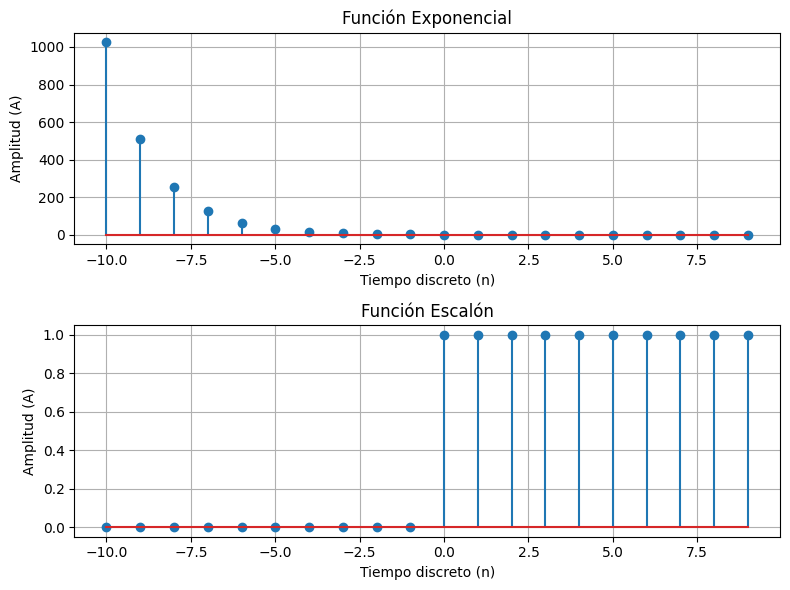

In [6]:
# Gráficas estáticas de las funciones
fig, axs = plt.subplots(2, 1, figsize=(8, 6))

# Exponencial
axs[0].stem(n, exp)
axs[0].set_xlabel('Tiempo discreto (n)')
axs[0].set_ylabel('Amplitud (A)')
axs[0].set_title('Función Exponencial')
axs[0].grid(True)

# Escalón
axs[1].stem(n, esc)
axs[1].set_xlabel('Tiempo discreto (n)')
axs[1].set_ylabel('Amplitud (A)')
axs[1].set_title('Función Escalón')
axs[1].grid(True)
fig.tight_layout()

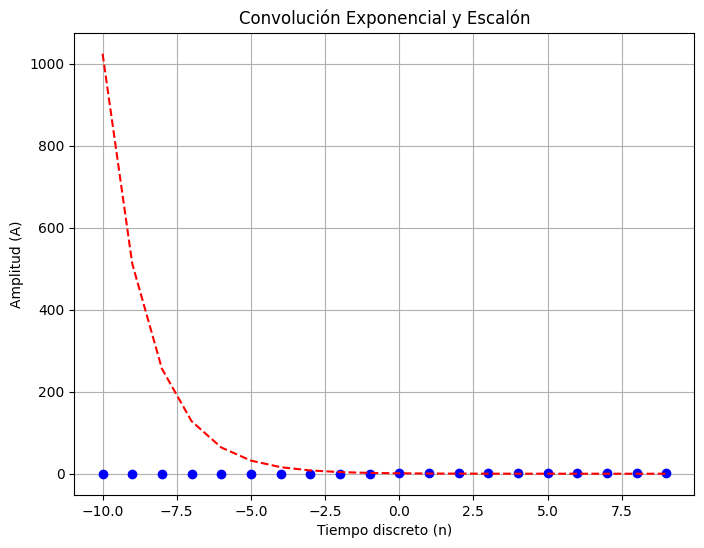

In [7]:
# Convolución
conv = np.convolve(exp, esc)

# Configuración de la figura
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlabel('Tiempo discreto (n)')
ax.set_ylabel('Amplitud (A)')
ax.set_title('Convolución Exponencial y Escalón')
ax.grid(True)

# Graficar la función escalón
ax.stem(n, esc, linefmt='b-', markerfmt='bo', basefmt=' ')

# Graficar la función exponencial
exp_line, = ax.plot(n, exp, 'r--', label='Exponencial')